In [14]:
import matplotlib.pyplot as plt #grafik
%matplotlib inline

from skimage import data  #menggunakan modul data yang disediakan oleh pustaka skimage
from skimage.io import imread#untuk membaca gambar dari file ke dalam bentuk array NumPy
from skimage.color import rgb2gray #untuk mengimpor fungsi rgb2gray dari modul color dalam pustaka skimage (scikit-image)
import numpy as np#data dalam bentuk array

import cv2 #mengimport gambar

Shape citra 1 :  (279, 236)
Shape citra 1 :  (378, 301)


Text(0.5, 1.0, 'Citra 2')

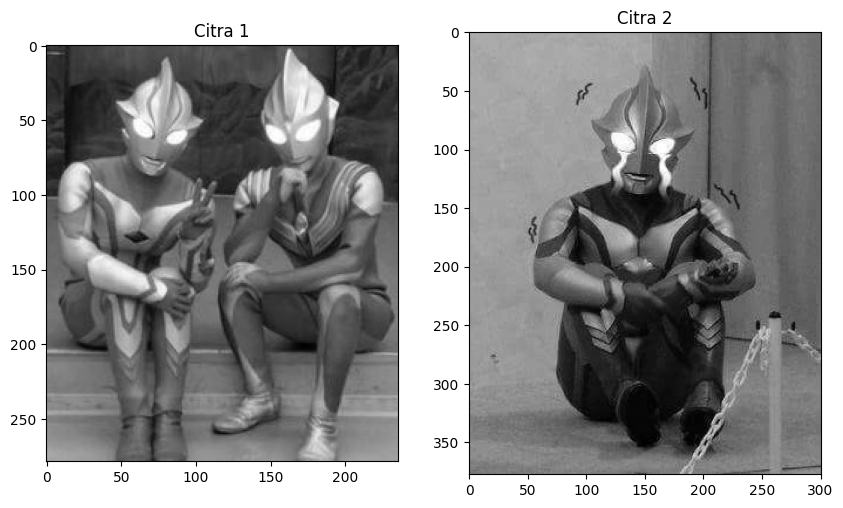

In [15]:
citra1 = imread(fname="hihi.jpg")#membaca gambar
citra1 = cv2.cvtColor(citra1,cv2.COLOR_RGB2GRAY)#untuk mengubah citra citra1 dari skala warna RGB menjadi skala abu-abu (grayscale) 
citra2 = imread(fname="sad.jpg")#membaca gambar
citra2 = cv2.cvtColor(citra2,cv2.COLOR_RGB2GRAY)#untuk mengubah citra citra1 dari skala warna RGB menjadi skala abu-abu (grayscale) 


#untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) citra 
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 1 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))#untuk membuat objek gambar (figure) dan objek sumbu (axes) dalam bentuk grid dengan 1 baris dan 2 kolom, dengan ukuran (dimensi) gambar sebesar 10x10 inci.
ax = axes.ravel()#untuk meratakan (flatten) objek array

ax[0].imshow(citra1, cmap = 'gray')#Citra ditampilkan dalam skala abu-abu (grayscale) 
ax[0].set_title("Citra 1")# judul
ax[1].imshow(citra2, cmap = 'gray')#Citra ditampilkan dalam skala abu-abu (grayscale) 
ax[1].set_title("Citra 2")# judul

In [3]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

In [16]:
#untuk membuat salinan citra
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

m1,n1 = copyCitra1.shape#untuk mengambil dimensi (jumlah baris dan kolom) dari citra dan menyimpannya dalam variabel m1 dan n1
output1 = np.empty([m1, n1])#untuk membuat array kosong dengan dimensi [m1, n1] menggunakan fungsi empty() dari modul NumPy

m2,n2 = copyCitra2.shape#untuk mengambil dimensi (jumlah baris dan kolom) dari citra
output2 = np.empty([m2, n2])#untuk membuat array kosong dengan dimensi [m1, n1] menggunakan fungsi empty() dari modul NumPy
print('Shape copy citra 1 : ', copyCitra1.shape)#untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) dari citra salinan 
print('Shape output citra 1 : ', output1.shape)

# untuk mencetak (menampilkan) nilai dari variabel 
print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)#untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) dari citra salinan
print('Shape output citra 3 : ', output2.shape)
# untuk mencetak (menampilkan) nilai dari variabel 
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (279, 236)
Shape output citra 1 :  (279, 236)
m1 :  279
n1 :  236

Shape copy citra 2 :  (378, 301)
Shape output citra 3 :  (378, 301)
m2 :  378
n2 :  301



In [17]:
for baris in range(0, m1-1): # untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah baris citra
    for kolom in range(0, n1-1):# untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah kolom citra
        a1 = baris
        b1 = kolom
        #untuk membuat sebuah array NumPy dengan elemen-elemen yang terdiri dari piksel-piksel pada posisi tertentu dalam citra
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
    
        for i in range(1, 8): #digunakan untuk melakukan iterasi (perulangan) pada range nilai dari 1 hingga 7.
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j]; #untuk mengganti nilai elemen
                    dataA[j]= tmpA;
        
        output1[a1, b1] = dataA[5]

In [18]:
for baris in range(0, m2-1):#untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m2-1, di mana m2 adalah jumlah baris citra 
    for kolom in range(0, n2-1):
        a1 = baris
        b1 = kolom
        #ntuk membuat sebuah array dataA dengan elemen-elemen yang terdiri dari nilai piksel pada posisi tertentu dalam citra
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8):
            for j in range(i, 9):
                if dataA[i] > dataA[j]:
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output2[a1, b1] = dataA[5]

Text(0.5, 1.0, 'Output Citra 2')

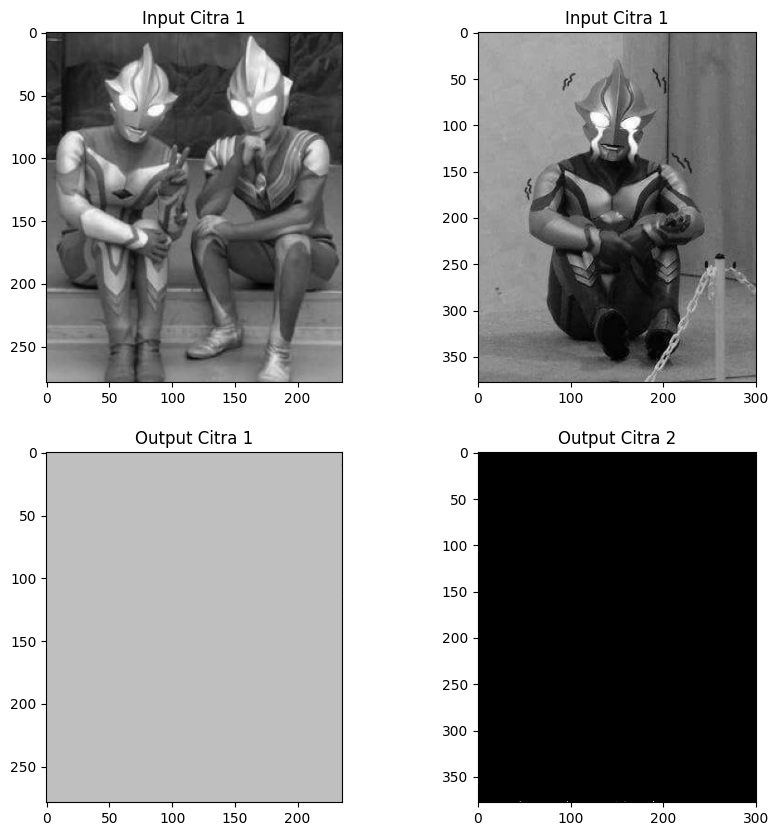

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))#untuk membuat objek gambar (figure) dan objek sumbu (axes) dalam bentuk grid dengan 2 baris dan 2 kolom, dengan ukuran (dimensi) gambar sebesar 10x10 inci
ax = axes.ravel()#untuk meratakan (flatten) objek array 

ax[0].imshow(citra1, cmap = 'gray')#untuk menampilkan citra citra1 pada sumbu (axis) dengan indeks 0 dari objek axes
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')#untuk menampilkan citra citra1 pada sumbu (axis) dengan indeks 0 dari objek axes
ax[1].set_title("Input Citra 1")

ax[2].imshow(output1, cmap = 'gray')#untuk menampilkan citra citra1 pada sumbu (axis) dengan indeks 0 dari objek axes
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')#untuk menampilkan citra citra1 pada sumbu (axis) dengan indeks 0 dari objek axesS
ax[3].set_title("Output Citra 2")